# User Overview Analysis

## Data Preparation

In [18]:
import os
print(os.listdir())

['.ipynb_checkpoints', 'data exploration.ipynb']


### Extract Dataframe

In [8]:
# loading data

#import pandas as pd
import numpy as np
import sys
import os
import re

from IPython.display import Image
import warnings
warnings.filterwarnings('ignore')

db = pd.read_excel("../data/TellCo_financial_data.xlsx", na_values=['?', None])

In [9]:
db.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,13114483460844900352,2019-04-04 12:01:18,770.0,2019-04-25 14:35:31,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9164566995485190,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,13114483482878900224,2019-04-09 13:04:04,235.0,2019-04-25 08:15:48,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,13114483484080500736,2019-04-09 17:42:11,1.0,2019-04-25 11:58:13,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,13114483485442799616,2019-04-10 00:31:25,486.0,2019-04-25 07:36:35,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,13114483499480700928,2019-04-12 20:10:23,565.0,2019-04-25 10:40:32,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


In [10]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype         
---  ------                                    --------------   -----         
 0   Bearer Id                                 150001 non-null  object        
 1   Start                                     150000 non-null  datetime64[ns]
 2   Start ms                                  150000 non-null  float64       
 3   End                                       150000 non-null  datetime64[ns]
 4   End ms                                    150000 non-null  float64       
 5   Dur. (ms)                                 150000 non-null  float64       
 6   IMSI                                      149431 non-null  float64       
 7   MSISDN/Number                             148935 non-null  float64       
 8   IMEI                                      149429 non-null  float64       
 9   Last Location N

In [12]:
# to get the number of rows[0] and columns[1] in the data

db.shape

(150001, 55)

In [13]:
# to get the data types of the dataframe's columns

db.dtypes

Bearer Id                                           object
Start                                       datetime64[ns]
Start ms                                           float64
End                                         datetime64[ns]
End ms                                             float64
Dur. (ms)                                          float64
IMSI                                               float64
MSISDN/Number                                      float64
IMEI                                               float64
Last Location Name                                  object
Avg RTT DL (ms)                                    float64
Avg RTT UL (ms)                                    float64
Avg Bearer TP DL (kbps)                            float64
Avg Bearer TP UL (kbps)                            float64
TCP DL Retrans. Vol (Bytes)                        float64
TCP UL Retrans. Vol (Bytes)                        float64
DL TP < 50 Kbps (%)                                float

### Deal with Missing Values

In [15]:
# Identifying the percent of missing values in the dataset as a whole

# how many missing values exist or better still what is the % of missing values in the dataset?
def percent_missing(df):

    # Calculate total number of cells in dataframe
    totalCells = np.product(df.shape)

    # Count number of missing values per column
    missingCount = df.isnull().sum()

    # Calculate total number of missing values
    totalMissing = missingCount.sum()

    # Calculate percentage of missing values
    print("The TellCo financial information dataset contains", round(((totalMissing/totalCells) * 100), 2), "%", "missing values.")

percent_missing(db)

The TellCo financial information dataset contains 12.49 % missing values.


In [11]:
# Identifying the percent of missing values per column

percent_missing = db.isnull().sum() * 100 / len(db)
missing_value_db = pd.DataFrame({'column_name': db.columns,
                                    'percent_missing': percent_missing})

missing_value_db.sort_values('percent_missing', inplace=True)
missing_value_db

,column_name,percent_missing
Bearer Id,Bearer Id,0.000000
Social Media DL (Bytes),Social Media DL (Bytes),0.000000
Social Media UL (Bytes),Social Media UL (Bytes),0.000000
Google DL (Bytes),Google DL (Bytes),0.000000
Google UL (Bytes),Google UL (Bytes),0.000000
Email DL (Bytes),Email DL (Bytes),0.000000
Email UL (Bytes),Email UL (Bytes),0.000000
Youtube DL (Bytes),Youtube DL (Bytes),0.000000
Netflix DL (Bytes),Netflix DL (Bytes),0.000000
Netflix UL (Bytes),Netflix UL (Bytes),0.000000


Now that we know that there are a number of columns with missing values, we will take a couple of approaches to fix these missing values.

1. If the column has more than 30% missing values; we drop the column completely
2. Check the skew of the column
       - If the skew is zero i.e. the data is not skewed, fill with wither the mean or median (**in our case, we'll fill with the mean**)
       - If the data is skewed, fill with the median

In [19]:
# Getting the skew of the data over the index axis

db.skew(axis=0)

Start ms                                      0.000968
End ms                                       -0.001163
Dur. (ms)                                     3.952609
IMSI                                         41.045956
MSISDN/Number                               332.155856
IMEI                                          1.071470
Avg RTT DL (ms)                              62.907828
Avg RTT UL (ms)                              28.457415
Avg Bearer TP DL (kbps)                       2.589437
Avg Bearer TP UL (kbps)                       4.503413
TCP DL Retrans. Vol (Bytes)                  15.951809
TCP UL Retrans. Vol (Bytes)                  84.113393
DL TP < 50 Kbps (%)                          -2.297803
50 Kbps < DL TP < 250 Kbps (%)                3.271453
250 Kbps < DL TP < 1 Mbps (%)                 4.566158
DL TP > 1 Mbps (%)                            5.370351
UL TP < 10 Kbps (%)                          -8.985016
10 Kbps < UL TP < 50 Kbps (%)                10.943888
50 Kbps < 

### Dealing with Outliers

In [ ]:
# Identifying outliers

### Transform Data

### Data Overview

We want to generate an overview of the users' behavior on the following applications: Social Media, Gooogle, Email, Youtube, Netflix, Gaming, Other

Aggregating per user ('MSISDN/Number') the following information in the column:
    number of xDR sessions () 
    session duration () 
    total ddownload and upload data ()
    total data volume in bytes during this session for each application ()

In [33]:
# aggregating per user the number of xDR sessions

user_num_xdr = db.groupby('MSISDN/Number').agg('count').reset_index().sort_values(by='Bearer Id')
user_num_xdr


,MSISDN/Number,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,3.360100e+10,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
65863,3.366740e+10,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
65861,3.366740e+10,1,1,1,1,1,1,1,1,0,...,1,1,1,1,1,1,1,1,1,1
65859,3.366740e+10,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
65858,3.366740e+10,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76363,3.367588e+10,15,15,15,15,15,15,15,15,15,...,15,15,15,15,15,15,15,15,15,15
37052,3.365973e+10,16,16,16,16,16,16,16,16,16,...,16,16,16,16,16,16,16,16,16,16
13180,3.362578e+10,17,17,17,17,17,17,17,17,17,...,17,17,17,17,17,17,17,17,17,17
6437,3.361489e+10,17,17,17,17,17,17,17,17,17,...,17,17,17,17,17,17,17,17,17,17


In [35]:
# aggregating per user the mean session duration

user_session_dur = db.groupby('MSISDN/Number').agg({'Dur. (ms)': 'mean'})
user_session_dur

,Dur. (ms)
MSISDN/Number,
3.360100e+10,116720.0
3.360100e+10,181230.0
3.360100e+10,134969.0
3.360101e+10,49878.0
3.360101e+10,18552.0
...,...
3.379000e+10,8810.0
3.379000e+10,140988.0
3.197021e+12,877385.0


In [40]:
# aggregating per user the total download and upload data

user_total_dlul = db.groupby('MSISDN/Number')['Total UL (Bytes)', 'Total DL (Bytes)'].sum()
user_total_dlul

,Total UL (Bytes),Total DL (Bytes)
MSISDN/Number,,
3.360100e+10,36053108.0,8.426375e+08
3.360100e+10,36104459.0,1.207552e+08
3.360100e+10,39306820.0,5.566597e+08
3.360101e+10,20327526.0,4.019932e+08
3.360101e+10,94280527.0,1.363130e+09
...,...,...
3.379000e+10,26716429.0,6.879252e+08
3.379000e+10,35732243.0,4.445751e+08
3.197021e+12,37295915.0,1.948281e+08


In [41]:
# aggregating per user the total download and upload data

user_total_dlul = db.groupby('MSISDN/Number')[['Total UL (Bytes)', 'Total DL (Bytes)']].sum()
user_total_dlul

,Total UL (Bytes),Total DL (Bytes)
MSISDN/Number,,
3.360100e+10,36053108.0,8.426375e+08
3.360100e+10,36104459.0,1.207552e+08
3.360100e+10,39306820.0,5.566597e+08
3.360101e+10,20327526.0,4.019932e+08
3.360101e+10,94280527.0,1.363130e+09
...,...,...
3.379000e+10,26716429.0,6.879252e+08
3.379000e+10,35732243.0,4.445751e+08
3.197021e+12,37295915.0,1.948281e+08


##### Aggregating per user the total data volume for each application


In [51]:
# Social Media

user_total_sm = db.groupby('MSISDN/Number')[['Social Media DL (Bytes)', 'Social Media UL (Bytes)']].sum()
user_total_sm

,Social Media DL (Bytes),Social Media UL (Bytes)
MSISDN/Number,,
3.360100e+10,2206504.0,25631.0
3.360100e+10,2598548.0,62017.0
3.360100e+10,3148004.0,47619.0
3.360101e+10,251469.0,28825.0
3.360101e+10,2861230.0,51312.0
...,...,...
3.379000e+10,234320.0,65863.0
3.379000e+10,442214.0,56355.0
3.197021e+12,668596.0,46628.0


In [53]:
# Youtube

user_total_yt = db.groupby('MSISDN/Number')[['Youtube DL (Bytes)', 'Youtube UL (Bytes)']].sum()
user_total_yt

,Youtube DL (Bytes),Youtube UL (Bytes)
MSISDN/Number,,
3.360100e+10,14900201.0,6724347.0
3.360100e+10,5324251.0,7107972.0
3.360100e+10,2137272.0,19196298.0
3.360101e+10,4393123.0,2584198.0
3.360101e+10,10339971.0,31193031.0
...,...,...
3.379000e+10,8294310.0,18353533.0
3.379000e+10,5596862.0,14254710.0
3.197021e+12,9839889.0,2120016.0


In [54]:
# Netflix

user_total_nf = db.groupby('MSISDN/Number')[['Netflix DL (Bytes)', 'Netflix UL (Bytes)']].sum()
user_total_nf

,Netflix DL (Bytes),Netflix UL (Bytes)
MSISDN/Number,,
3.360100e+10,10265105.0,16915876.0
3.360100e+10,770569.0,10451194.0
3.360100e+10,16525919.0,2827981.0
3.360101e+10,1157362.0,784730.0
3.360101e+10,24971647.0,24230077.0
...,...,...
3.379000e+10,14754741.0,147797.0
3.379000e+10,6929961.0,1601099.0
3.197021e+12,10340908.0,16251392.0


In [55]:
# Google

user_total_gg = db.groupby('MSISDN/Number')[['Google DL (Bytes)', 'Google UL (Bytes)']].sum()
user_total_gg

,Google DL (Bytes),Google UL (Bytes)
MSISDN/Number,,
3.360100e+10,3337123.0,1051882.0
3.360100e+10,4197697.0,1137166.0
3.360100e+10,3343483.0,99643.0
3.360101e+10,5937765.0,3740728.0
3.360101e+10,13728668.0,4770948.0
...,...,...
3.379000e+10,6834178.0,697091.0
3.379000e+10,1472406.0,3957299.0
3.197021e+12,8572779.0,1865881.0


In [56]:
# Email

user_total_em = db.groupby('MSISDN/Number')[['Email DL (Bytes)', 'Email UL (Bytes)']].sum()
user_total_em

,Email DL (Bytes),Email UL (Bytes)
MSISDN/Number,,
3.360100e+10,837400.0,493962.0
3.360100e+10,2828821.0,478960.0
3.360100e+10,2436500.0,768880.0
3.360101e+10,2178618.0,106052.0
3.360101e+10,2247808.0,1057661.0
...,...,...
3.379000e+10,480946.0,525969.0
3.379000e+10,2513433.0,664.0
3.197021e+12,842279.0,678492.0


In [57]:
# Gaming

user_total_game = db.groupby('MSISDN/Number')[['Gaming DL (Bytes)', 'Gaming UL (Bytes)']].sum()
user_total_game

,Gaming DL (Bytes),Gaming UL (Bytes)
MSISDN/Number,,
3.360100e+10,8.110911e+08,1367528.0
3.360100e+10,1.050353e+08,14714780.0
3.360100e+10,5.290685e+08,9759228.0
3.360101e+10,3.880748e+08,3051292.0
3.360101e+10,1.308981e+09,5816727.0
...,...,...
3.379000e+10,6.573267e+08,3034642.0
3.379000e+10,4.276202e+08,9383076.0
3.197021e+12,1.645636e+08,13485133.0


In [60]:
# Other

user_total_oth = db.groupby('MSISDN/Number')[['Other DL (Bytes)', 'Other UL (Bytes)']].sum()
user_total_oth

,Other DL (Bytes),Other UL (Bytes)
MSISDN/Number,,
3.360100e+10,377096990.0,9473882.0
3.360100e+10,279557701.0,2152370.0
3.360100e+10,495086501.0,6607171.0
3.360101e+10,25248001.0,10031701.0
3.360101e+10,777643713.0,27160771.0
...,...,...
3.379000e+10,291391283.0,3891534.0
3.379000e+10,204636073.0,6479040.0
3.197021e+12,467678100.0,2848373.0


### Conducting Exploratory Data Analysis

In [43]:
# Describe all relevant variables and associated data types

db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype         
---  ------                                    --------------   -----         
 0   Bearer Id                                 150001 non-null  object        
 1   Start                                     150000 non-null  datetime64[ns]
 2   Start ms                                  150000 non-null  float64       
 3   End                                       150000 non-null  datetime64[ns]
 4   End ms                                    150000 non-null  float64       
 5   Dur. (ms)                                 150000 non-null  float64       
 6   IMSI                                      149431 non-null  float64       
 7   MSISDN/Number                             148935 non-null  float64       
 8   IMEI                                      149429 non-null  float64       
 9   Last Location N

In [42]:
# Analysing the basic metrics in the dataset

db.describe()

,Start ms,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
count,150000.000000,150000.000000,1.500000e+05,1.494310e+05,1.489350e+05,1.494290e+05,122172.000000,122189.000000,150000.000000,150000.000000,...,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500000e+05,1.500000e+05
mean,499.188200,498.800880,1.046086e+05,2.082016e+14,4.188282e+10,4.847455e+13,109.795706,17.662883,13300.045927,1770.428647,...,1.163407e+07,1.100941e+07,1.162685e+07,1.100175e+07,4.220447e+08,8.288398e+06,4.211005e+08,8.264799e+06,4.112121e+07,4.546434e+08
std,288.611834,288.097653,8.103762e+04,2.148809e+10,2.447443e+12,2.241637e+13,619.782739,84.793524,23971.878541,4625.355500,...,6.710569e+06,6.345423e+06,6.725218e+06,6.359490e+06,2.439675e+08,4.782700e+06,2.432050e+08,4.769004e+06,1.127639e+07,2.441429e+08
min,0.000000,0.000000,7.142000e+03,2.040471e+14,3.360100e+10,4.400152e+11,0.000000,0.000000,0.000000,0.000000,...,5.300000e+01,1.050000e+02,4.200000e+01,3.500000e+01,2.516000e+03,5.900000e+01,3.290000e+03,1.480000e+02,2.866892e+06,7.114041e+06
25%,250.000000,251.000000,5.744050e+04,2.082014e+14,3.365130e+10,3.546071e+13,32.000000,2.000000,43.000000,47.000000,...,5.833501e+06,5.517965e+06,5.777156e+06,5.475981e+06,2.104733e+08,4.128476e+06,2.101869e+08,4.145943e+06,3.322201e+07,2.431068e+08
50%,499.000000,500.000000,8.639900e+04,2.082015e+14,3.366371e+10,3.572201e+13,45.000000,5.000000,63.000000,63.000000,...,1.161602e+07,1.101345e+07,1.164222e+07,1.099638e+07,4.234081e+08,8.291208e+06,4.218030e+08,8.267071e+06,4.114331e+07,4.558411e+08
75%,749.000000,750.000000,1.324302e+05,2.082018e+14,3.368349e+10,8.611970e+13,70.000000,15.000000,19710.750000,1120.000000,...,1.744852e+07,1.651556e+07,1.747048e+07,1.650727e+07,6.331742e+08,1.243162e+07,6.316918e+08,1.238415e+07,4.903424e+07,6.657055e+08
max,999.000000,999.000000,1.859336e+06,2.140743e+14,8.823971e+14,9.900120e+13,96923.000000,7120.000000,378160.000000,58613.000000,...,2.325910e+07,2.201196e+07,2.325919e+07,2.201196e+07,8.434419e+08,1.655879e+07,8.434425e+08,1.655882e+07,7.833131e+07,9.029696e+08


#### Non-Graphical Univariate Analysis

Computing dispersion parameters for each quantitative variable

In [72]:
# Computing dispersion parameters for each quantitative variable (mean, standard deviation, range, perventiles)

db.describe()

,Start ms,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
count,150000.000000,150000.000000,1.500000e+05,1.494310e+05,1.489350e+05,1.494290e+05,122172.000000,122189.000000,150000.000000,150000.000000,...,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500000e+05,1.500000e+05
mean,499.188200,498.800880,1.046086e+05,2.082016e+14,4.188282e+10,4.847455e+13,109.795706,17.662883,13300.045927,1770.428647,...,1.163407e+07,1.100941e+07,1.162685e+07,1.100175e+07,4.220447e+08,8.288398e+06,4.211005e+08,8.264799e+06,4.112121e+07,4.546434e+08
std,288.611834,288.097653,8.103762e+04,2.148809e+10,2.447443e+12,2.241637e+13,619.782739,84.793524,23971.878541,4625.355500,...,6.710569e+06,6.345423e+06,6.725218e+06,6.359490e+06,2.439675e+08,4.782700e+06,2.432050e+08,4.769004e+06,1.127639e+07,2.441429e+08
min,0.000000,0.000000,7.142000e+03,2.040471e+14,3.360100e+10,4.400152e+11,0.000000,0.000000,0.000000,0.000000,...,5.300000e+01,1.050000e+02,4.200000e+01,3.500000e+01,2.516000e+03,5.900000e+01,3.290000e+03,1.480000e+02,2.866892e+06,7.114041e+06
25%,250.000000,251.000000,5.744050e+04,2.082014e+14,3.365130e+10,3.546071e+13,32.000000,2.000000,43.000000,47.000000,...,5.833501e+06,5.517965e+06,5.777156e+06,5.475981e+06,2.104733e+08,4.128476e+06,2.101869e+08,4.145943e+06,3.322201e+07,2.431068e+08
50%,499.000000,500.000000,8.639900e+04,2.082015e+14,3.366371e+10,3.572201e+13,45.000000,5.000000,63.000000,63.000000,...,1.161602e+07,1.101345e+07,1.164222e+07,1.099638e+07,4.234081e+08,8.291208e+06,4.218030e+08,8.267071e+06,4.114331e+07,4.558411e+08
75%,749.000000,750.000000,1.324302e+05,2.082018e+14,3.368349e+10,8.611970e+13,70.000000,15.000000,19710.750000,1120.000000,...,1.744852e+07,1.651556e+07,1.747048e+07,1.650727e+07,6.331742e+08,1.243162e+07,6.316918e+08,1.238415e+07,4.903424e+07,6.657055e+08
max,999.000000,999.000000,1.859336e+06,2.140743e+14,8.823971e+14,9.900120e+13,96923.000000,7120.000000,378160.000000,58613.000000,...,2.325910e+07,2.201196e+07,2.325919e+07,2.201196e+07,8.434419e+08,1.655879e+07,8.434425e+08,1.655882e+07,7.833131e+07,9.029696e+08


#### Graphical Univariate Analysis

#### Bivariate Analysis

A scatter plot is a graph of the ordered pairs (x,y) of
numbers consisting of the independent variable x and
the dependent variable y.

In [67]:
# Importing plotting library

import matplotlib.pyplot as plt

In [131]:
# total dl + ul data

total_dlul = (db['Total DL (Bytes)'] + db['Total UL (Bytes)']).astype("float64")
total_dlul
len(total_dlul)

150001

In [132]:
# total social media dl + ul data
total_sm_dlul = (db['Social Media DL (Bytes)'] + db['Social Media UL (Bytes)']).astype("float64")
print(total_sm_dlul)
len(total_sm_dlul)

0         1.570185e+06
1         1.933278e+06
2         1.726277e+06
3         6.574930e+05
4         9.127880e+05
              ...     
149996    3.517065e+06
149997    2.352181e+06
149998    1.260239e+06
149999    8.231090e+05
150000    1.828250e+06
Length: 150001, dtype: float64


150001

ValueError: x and y must be the same size

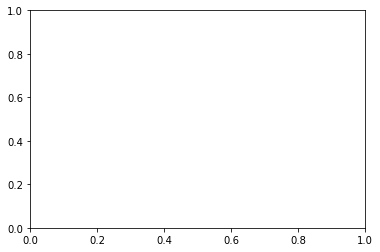

In [139]:
# Scatter matrix of total social media data volume vs total data volume

# total social media dl + ul data
total_sm_dlul = (db['Social Media DL (Bytes)'] + db['Social Media UL (Bytes)']).astype("float64")

plt.scatter(db.sample(10000), total_sm_dlul , total_dlul)
plt.show()

In [137]:
# Scatter matrix of total youtube data volume vs total data volume

# total youtube dl + ul data
total_yt_dlul = (db['Youtube DL (Bytes)'] + db['Youtube UL (Bytes)']).astype("float64")

# plt.scatter(db.sample(10000), total_yt_dlul , total_dlul)
# plt.show()

In [125]:
# Scatter matrix of total netflix data volume vs total data volume

# total netflix dl + ul data
total_nf_dlul = (db['Netflix DL (Bytes)'] + db['Netflix UL (Bytes)']).astype("float64")

# plt.scatter(db.sample(10000), total_nf_dlul , total_dlul)
# plt.show()

In [126]:
# Scatter matrix of total google data volume vs total data volume

# total google dl + ul data
total_gg_dlul = (db['Google DL (Bytes)'] + db['Google UL (Bytes)']).astype("float64")

# plt.scatter(db.sample(10000), total_gg_dlul , total_dlul)
# plt.show()

In [127]:
# Scatter matrix of total email data volume vs total data volume

# total email dl + ul data
total_em_dlul = (db['Email DL (Bytes)'] + db['Email UL (Bytes)']).astype("float64")

# plt.scatter(db.sample(10000), total_em_dlul , total_dlul)
# plt.show()

In [128]:
# Scatter matrix of total gaming data volume vs total data volume

# total gaming dl + ul data
total_game_dlul = (db['Gaming DL (Bytes)'] + db['Gaming UL (Bytes)']).astype("float64")

# plt.scatter(db.sample(10000), total_game_dlul , total_dlul)
# plt.show()

In [129]:
# Scatter matrix of total other data volume vs total data volume

# total other dl + ul data
total_oth_dlul = (db['Other DL (Bytes)'] + db['Other UL (Bytes)']).astype("float64")

# plt.scatter(db.sample(10000), total_oth_dlul , total_dlul)
# plt.show()

#### Variable Transformations

#### Correlation Analysis

In [136]:
# Computing a correlation matrix

# data = {'x': total_dlul,
#         'y': [total_sm_dlul, total_gg_dlul, total_em_dlul, total_yt_dlul, 
#              total_nf_dlul, total_game_dlul, total_oth_dlul]}

# data = {total_dlul, total_sm_dlul, total_gg_dlul, total_em_dlul, total_yt_dlul, 
#              total_nf_dlul, total_game_dlul, total_oth_dlul}

# newdb = pd.DataFrame(data)
# corr_db = newdb.corr()
# print(corr_db)

In [122]:
# Plotting the correlation matrix visually

import seaborn as sn
import matplotlib.pyplot as plt


# sn.heatmap(corr_db, annot=True)
# plt.show()

#### Dimensionality Reduction

## Handsets

In [140]:
# Top 10 handset used by the customers

db['Handset Type'].value_counts().head(10)

Huawei B528S-23A                19752
Apple iPhone 6S (A1688)          9419
Apple iPhone 6 (A1586)           9023
undefined                        8987
Apple iPhone 7 (A1778)           6326
Apple iPhone Se (A1723)          5187
Apple iPhone 8 (A1905)           4993
Apple iPhone Xr (A2105)          4568
Samsung Galaxy S8 (Sm-G950F)     4520
Apple iPhone X (A1901)           3813
Name: Handset Type, dtype: int64

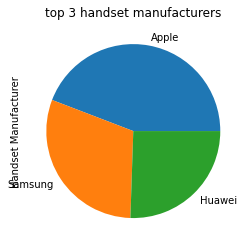

In [148]:
# Top 3 handset manufacturers

db['Handset Manufacturer'].value_counts().head(3).plot(kind='pie',  title="top 3 handset manufacturers");

In [146]:
# Top 5 handsets per top 3 handset manufacturer

top3_manufs = db[['Handset Manufacturer']].value_counts().head(3)
top3_manufs = db['Handset Manufacturer'].value_counts().head(3)
top3_manufs = db[db["Handset Manufacturer"].isin(top3_manufs.index.tolist())]
top5_handsets = top3_manufs['Handset Type'].groupby(db['Handset Manufacturer']).apply(lambda x: x.value_counts().head(5))
top5_handsets

Handset Manufacturer                                
Apple                 Apple iPhone 6S (A1688)            9419
                      Apple iPhone 6 (A1586)             9023
                      Apple iPhone 7 (A1778)             6326
                      Apple iPhone Se (A1723)            5187
                      Apple iPhone 8 (A1905)             4993
Huawei                Huawei B528S-23A                  19752
                      Huawei E5180                       2079
                      Huawei P20 Lite Huawei Nova 3E     2021
                      Huawei P20                         1480
                      Huawei Y6 2018                      997
Samsung               Samsung Galaxy S8 (Sm-G950F)       4520
                      Samsung Galaxy A5 Sm-A520F         3724
                      Samsung Galaxy J5 (Sm-J530)        3696
                      Samsung Galaxy J3 (Sm-J330)        3484
                      Samsung Galaxy S7 (Sm-G930X)       3199
Name: Handset Typ